In [42]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
import os


In [43]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [44]:
IMG_SIZE=128

In [45]:
def loaddataset(basepath):
    X,Y=[],[]
    for label,folder in enumerate(['no','yes']):
        #verifying yes and no are there in dataset and checking path by the folder and listof files
        floder_path=os.path.join(basepath,folder)
        for file in os.listdir(floder_path):
            path=os.path.join(floder_path,file)
            #reading the image,0 for grade scale conversion
            img=cv2.imread(path,0)
            if img is None:
                continue
            img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #128*128
            #resizing the image
            img=img.reshape(IMG_SIZE,IMG_SIZE,1)
            #adding the image and to the empty list
            X.append(img)
            Y.append(label) #label means yes or no
    return np.array(X),np.array(Y)
    #converting the image pixel to the numerical value by numpy array

In [46]:
sr="C:\\Users\\KOMALIG\\OneDrive\\future dealer\\OneDrive\\Internship\\TRAINING\\25.Medical Diagnosis of Brain Tumour\\dataset"
X,Y = loaddataset(sr)

In [47]:
X=X.astype("float32")/255.0
##converting into float
Y=to_categorical(Y)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [48]:
model = Sequential()
# here we created model with Sequential.one after other layers available.
#it is the beginning layer of hidden layer which sends info.
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 1)))
#conv2D is the hidden layer which undergo 32 epochs with img size 128*128.
model.add(MaxPooling2D(pool_size=(2, 2)))
#maxPooling2D is the layer in hidden which verify the content.which will normalize or vexctorize the 3d content to 1d
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#flatten normalize more.
model.add(Flatten())
model.add(Dense(128, activation='relu'))   
#output layer with 2 class
model.add(Dense(2, activation='softmax'))      # fixed keyword

In [49]:
#compile the model.inside thw trained data,we are sending model.fit
#validatio_split=the testing value
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#storing info in hist
hist=model.fit(X_train,y_train,batch_size=16,epochs=10,validation_split=0.2,shuffle=True,verbose=2)



Epoch 1/10
10/10 - 1s - loss: 0.7398 - accuracy: 0.7312 - val_loss: 0.5631 - val_accuracy: 0.6829
Epoch 2/10
10/10 - 1s - loss: 0.4604 - accuracy: 0.8188 - val_loss: 0.5181 - val_accuracy: 0.7805
Epoch 3/10
10/10 - 1s - loss: 0.4217 - accuracy: 0.8188 - val_loss: 0.3953 - val_accuracy: 0.8293
Epoch 4/10
10/10 - 1s - loss: 0.3078 - accuracy: 0.8813 - val_loss: 0.3613 - val_accuracy: 0.8049
Epoch 5/10
10/10 - 1s - loss: 0.1883 - accuracy: 0.9375 - val_loss: 0.3876 - val_accuracy: 0.8049
Epoch 6/10
10/10 - 1s - loss: 0.0987 - accuracy: 0.9688 - val_loss: 0.4067 - val_accuracy: 0.8293
Epoch 7/10
10/10 - 1s - loss: 0.0492 - accuracy: 0.9875 - val_loss: 0.3516 - val_accuracy: 0.8780
Epoch 8/10
10/10 - 1s - loss: 0.0629 - accuracy: 0.9875 - val_loss: 0.4023 - val_accuracy: 0.8293
Epoch 9/10
10/10 - 1s - loss: 0.0342 - accuracy: 0.9875 - val_loss: 0.5920 - val_accuracy: 0.8293
Epoch 10/10
10/10 - 1s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.4768 - val_accuracy: 0.8537


In [50]:

# Create directory if it doesn't exist
os.makedirs('Model', exist_ok=True)

#save model weights.h5 model is like a brain.which stores the acc,loss,val_loss,val_acc info of each epoch.
model.save_weights('Model/model_weights.h5')

# Save model architecture. creating the json for clarity understanding of the layer name,fn etc.
model_json = model.to_json()
model_json

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_2", "trainable": true, "batch_input_shape": [null, 128, 128, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_2", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], 

In [51]:
import pickle

In [52]:
#conecting json format
model_json=model.to_json()
with open("Model/model.json","w") as json_file:
    json_file.write(model_json)
#model train log info store in wb.file name=f.acc,loss,val_loss,val_acc is stored in the hist.history
#.we are loading that history in pickle by dump inside the file. as it is the text format.picke is like a coping info from pendrive 😎
f=open('Model/history.pckl','wb')
pickle.dump(hist.history,f)
f.close()

In [53]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(loss)
print(accuracy)

0.9760172367095947
0.7450980544090271


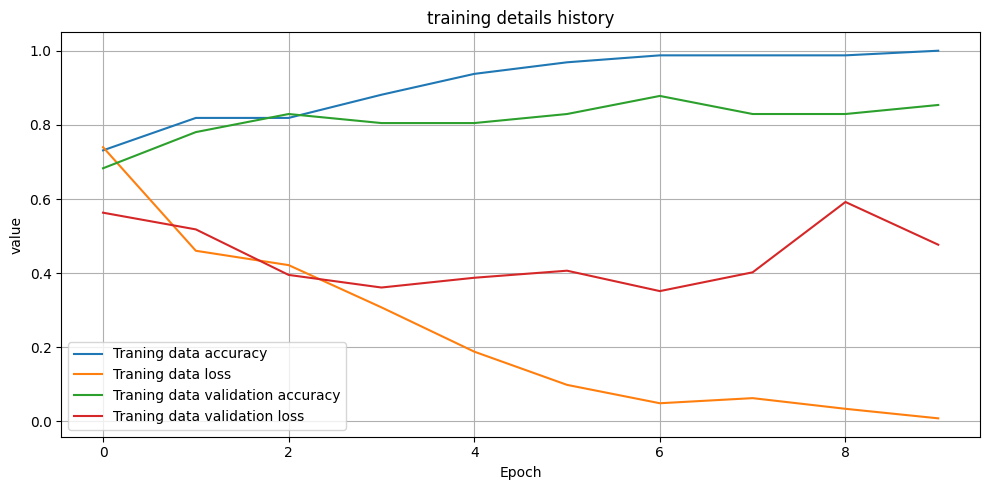

In [54]:
#call matplotlib graphs to draw accuracy performance value
acc=hist.history['accuracy']
los=hist.history['loss']

val_acc=hist.history['val_accuracy']
val_los=hist.history['val_loss']

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(acc,label="Traning data accuracy")
plt.plot(los,label="Traning data loss")
plt.plot(val_acc,label="Traning data validation accuracy")
plt.plot(val_los,label="Traning data validation loss")

#x and y axis.
plt.xlabel('Epoch')
plt.ylabel('value')

plt.title('training details history')
#which call the matplotlib
plt.legend()
plt.grid(True)
#structure of the frame
plt.tight_layout()
plt.show()


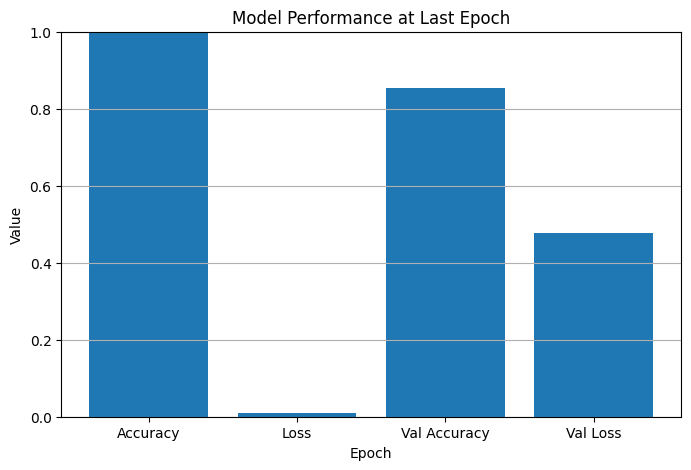

In [55]:

#to get the last values
last_values=[acc[-1],los[-1],val_acc[-1],val_los[-1]]
labels = ['Accuracy','Loss', 'Val Accuracy', 'Val Loss']

plt.figure(figsize=(8,5))
plt.bar(labels,last_values)
plt.title('Model Performance at Last Epoch')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.ylim(0,1)  # Adjust Y-axis if needed
plt.grid(axis='y')
plt.show()

In [57]:
#import new image in op  by cv2. convert it to array by numpy
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json

In [58]:
#load json file
json_file=open('Model/model.json','r')
loaded_model_json=json_file.read()
json_file.close()

In [59]:
#how to load the weights
model=model_from_json(loaded_model_json)
model.load_weights("Model/model_weights.h5")
print("[INFO] Loaded model from disk")

[INFO] Loaded model from disk


In [81]:
disease=["No tumor detected","tumor detected"]

# filename="1 no.jpeg"
filename="Y257.jpg"
#read the img,0 is the flag
img=cv2.imread(filename,0)
img=cv2.resize(img,(128,128))
#1 is the batch no and another 1 is grey img convertor
img=img.reshape(1,128,128,1)
#converting img to pixel
img=img.astype('float32')/255.0

In [83]:
#call model
predicts=model.predict(img)
cls=np.argmax(predicts)
print(f"[INFO] Prediction Probabilities: {predicts}")
print(f"[INFO] Classified as: {disease[cls]}")

[INFO] Prediction Probabilities: [[0.00254417 0.9974559 ]]
[INFO] Classified as: tumor detected


In [86]:
cls

1

In [87]:

def edgeDetection():
    img = cv2.imread('myimg.png')
    orig = cv2.imread('test1.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)[1]
    contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    min_area = 0.95*180*35
    max_area = 1.05*180*35
    result = orig.copy()
    for c in contours:
        area = cv2.contourArea(c)
        cv2.drawContours(result, [c], -1, (0, 0, 255), 10)
        if area > min_area and area < max_area:
            cv2.drawContours(result, [c], -1, (0, 255, 255), 10)
    return result    


In [89]:
import cv2
import matplotlib.pyplot as plt

# Example values
# cls = 0 or 1
# filename = 'your_image_path.jpg'
# disease = ['Normal', 'Tumor']

if cls == 0:
    img = cv2.imread(filename)
    img = cv2.resize(img, (800, 500))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for matplotlib display

    plt.figure(figsize=(10, 6))
    plt.title('Classification Result: ' + disease[cls])
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [92]:
import cv2
import matplotlib.pyplot as plt
import os

def tumorSegmentation(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"❌ Cannot perform segmentation: failed to load {image_path}")
        return None, None

    segmented = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)[1]
    edges = cv2.Canny(img_gray, 100, 200)
    return segmented, edges

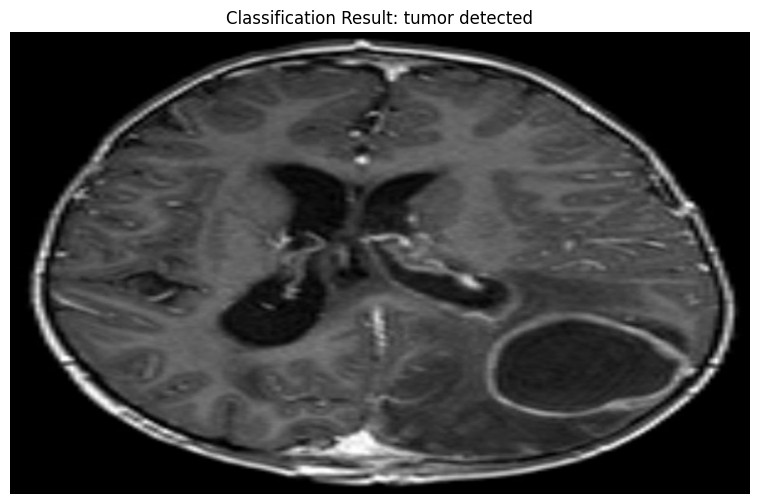

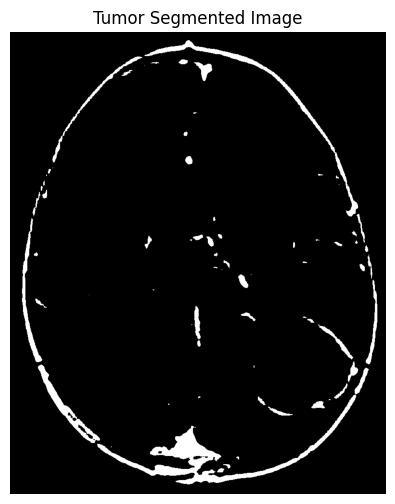

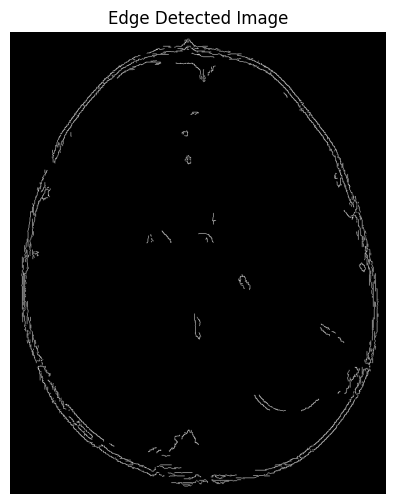

In [93]:
if cls == 1:
    if not os.path.exists(filename):
        print(f"❌ File does not exist: {filename}")
    else:
        segmented_image, edge_image = tumorSegmentation(filename)

        img = cv2.imread(filename)
        if img is None:
            print(f"❌ Failed to load image: {filename}")
        else:
            img = cv2.resize(img, (800, 500))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Display original image
            plt.figure(figsize=(10, 6))
            plt.title('Classification Result: ' + disease[cls])
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            if segmented_image is not None:
                # Display segmented image
                plt.figure(figsize=(8, 6))
                plt.title("Tumor Segmented Image")
                plt.imshow(segmented_image, cmap='gray')
                plt.axis('off')
                plt.show()

                # Display edge detected image
                edge_image_rgb = cv2.cvtColor(edge_image, cv2.COLOR_GRAY2RGB)
                plt.figure(figsize=(8, 6))
                plt.title("Edge Detected Image")
                plt.imshow(edge_image_rgb)
                plt.axis('off')
                plt.show()